In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_excel('power.xlsx')
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
0,2.242,0.162,237.33,10.0,1,7,17
1,3.714,0.296,235.15,15.8,2,35,17
2,3.212,0.304,235.99,14.2,1,26,17
3,3.694,0.280,235.16,15.6,1,35,17
4,3.204,0.292,236.08,14.0,1,27,17


In [49]:
df.shape

(21240, 7)

In [50]:
df.dtypes

Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Kitchen_consumption               int64
Laundry_consumption               int64
Other_appliances_consumption      int64
dtype: object

### Checking the distributions

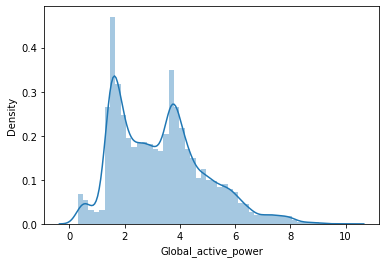

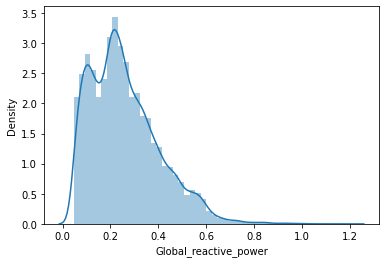

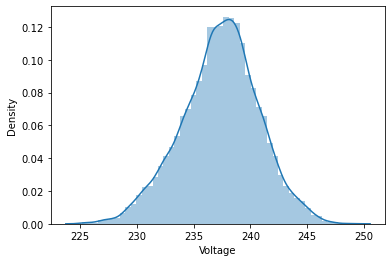

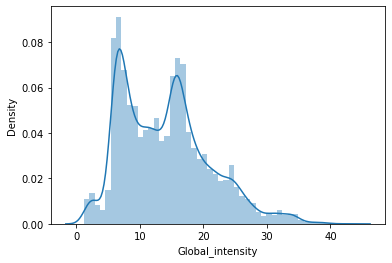

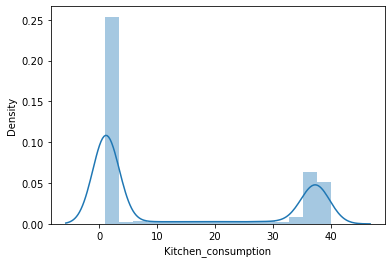

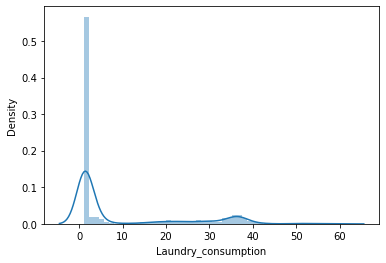

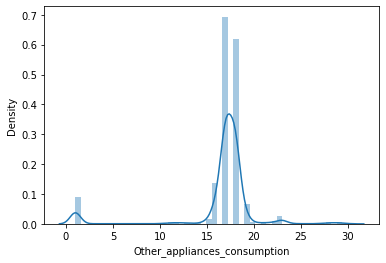

In [51]:
for col in df.columns:
    sns.distplot(df[col])
    plt.show()

### Remove Outliers

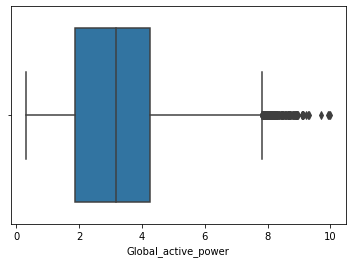

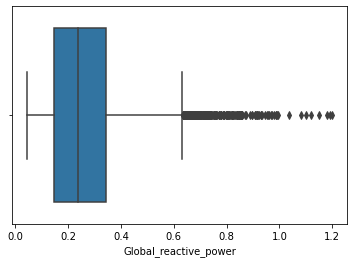

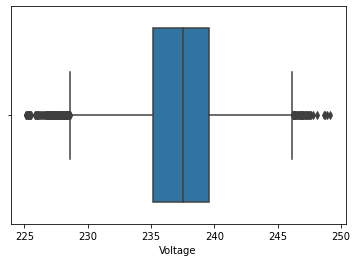

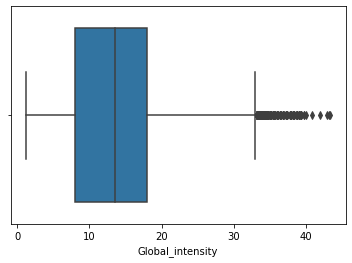

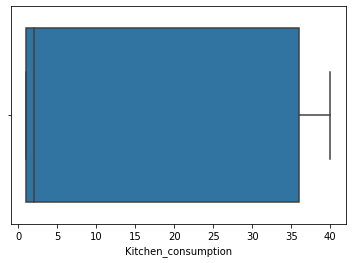

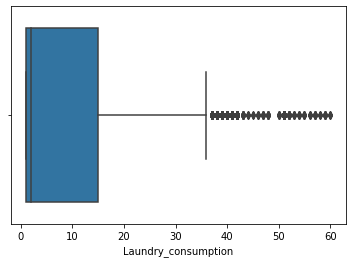

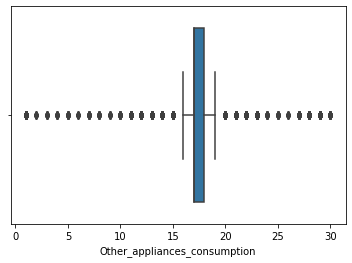

In [52]:
for col in df.columns:
    sns.boxplot(x=col, data=df)
    plt.show()

In [53]:
# write your code here
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1

dfc = df[~((df<(q1-1.5*iqr))|(df>(q3+1.5*iqr))).any(axis=1)]
dfc = dfc.reset_index(drop=True)

In [54]:
dfc.shape

(16724, 7)

### Statistical Summary of all variables

In [37]:
dfc.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
count,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000
mean,3.197480,0.249404,237.351591,13.601495,13.151937,6.802141,17.428426
std,1.444141,0.132148,3.289317,6.204866,16.384600,10.920451,0.705236
min,0.302000,0.046000,228.600000,1.200000,1.000000,1.000000,16.000000
25%,1.858000,0.144000,235.220000,7.800000,1.000000,1.000000,17.000000
50%,3.096000,0.230000,237.510000,13.200000,1.000000,2.000000,17.000000
75%,4.100000,0.332000,239.520000,17.400000,36.000000,4.000000,18.000000
max,7.716000,0.632000,246.150000,33.000000,40.000000,36.000000,19.000000


### Check for Missing Values

In [38]:
dfc.isnull().sum()

Global_active_power             0
Global_reactive_power           0
Voltage                         0
Global_intensity                0
Kitchen_consumption             0
Laundry_consumption             0
Other_appliances_consumption    0
dtype: int64

### Prepare the Data

In [39]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

dfcs = ss.fit_transform(dfc)
dfcs = pd.DataFrame(dfcs, columns=dfc.columns)

In [40]:
dfcs.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
0,-0.661645,-0.661430,-0.006564,-0.580448,-0.741690,0.018119,-0.607511
1,0.357676,0.352612,-0.669335,0.354330,-0.680656,2.582192,-0.607511
2,0.010054,0.413151,-0.413956,0.096460,-0.741690,1.758026,-0.607511
3,0.343827,0.231532,-0.666295,0.322096,-0.741690,2.582192,-0.607511
4,0.004515,0.322342,-0.386593,0.064227,-0.741690,1.849600,-0.607511


### k-Means Clustering

In [41]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

wcss=[]
sscore=[]
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(dfcs)
    wcss.append(kmeans.inertia_)
    score = silhouette_score(dfcs, kmeans.labels_)
    sscore.append(score)

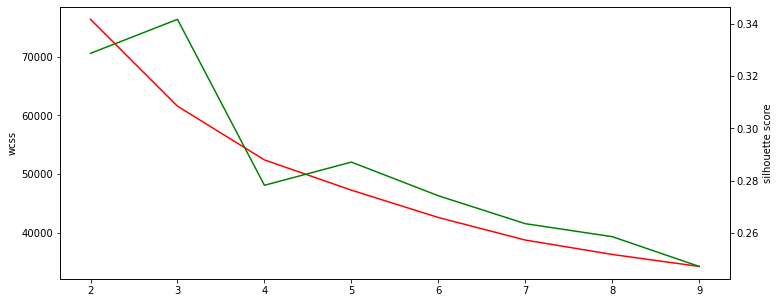

In [42]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(range(2,10), wcss, 'r')
ax.set_ylabel('wcss')
ax1=ax.twinx()
ax1.plot(range(2,10), sscore, 'g')
ax1.set_ylabel('silhouette score')
plt.show()

### Profiling Clusters

In [43]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(dfcs)

dfc['cluster'] = kmeans.labels_

In [44]:
dfc.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption,cluster
0,2.242,0.162,237.33,10.0,1,7,17,1
1,3.714,0.296,235.15,15.8,2,35,17,0
2,3.212,0.304,235.99,14.2,1,26,17,0
3,3.694,0.280,235.16,15.6,1,35,17,0
4,3.204,0.292,236.08,14.0,1,27,17,0


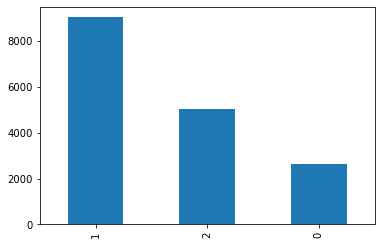

In [45]:
dfc['cluster'].value_counts().plot(kind='bar')
plt.show()

In [46]:
dfc.groupby('cluster').agg('mean')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
cluster,,,,,,,
0,4.902894,0.245573,235.085338,21.011094,12.846884,29.959726,17.043313
1,2.111005,0.239549,238.792199,8.932522,1.803761,2.687389,17.656416
2,4.253120,0.269036,235.954456,18.095843,33.617181,2.100356,17.221101


### Cluster Centres

In [47]:
(kmeans.cluster_centers_).shape

(3, 7)

In [56]:
pd.DataFrame(kmeans.cluster_centers_,columns=dfc.columns)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
0,1.181440,-0.028673,-0.689510,1.194686,-0.018344,2.120806,-0.546070
1,-0.752144,-0.074603,0.437990,-0.752265,-0.692644,-0.376585,0.323085
2,0.731047,0.148486,-0.424906,0.724364,1.249485,-0.430560,-0.293927


### Hierarchical Clustering

In [57]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

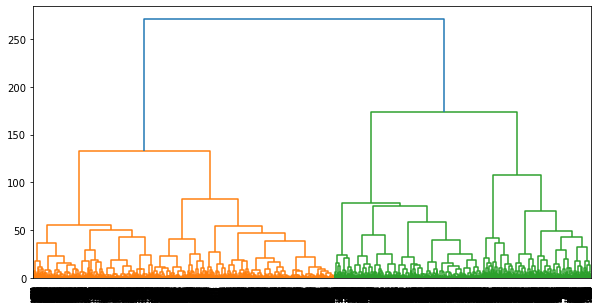

In [60]:
plt.figure(figsize=(10, 5))
mergings = linkage(dfcs, method='ward', metric='euclidean')
dendrogram(mergings)
plt.show()

In [61]:
clustercut = pd.Series(cut_tree(mergings, n_clusters=3).reshape(-1,))
clustercut

0        0
1        1
2        1
3        1
4        1
        ..
16719    0
16720    0
16721    0
16722    0
16723    0
Length: 16724, dtype: int32

In [62]:
df['cluster'] = clustercut
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption,cluster
0,2.242,0.162,237.33,10.0,1,7,17,0.0
1,3.714,0.296,235.15,15.8,2,35,17,1.0
2,3.212,0.304,235.99,14.2,1,26,17,1.0
3,3.694,0.280,235.16,15.6,1,35,17,1.0
4,3.204,0.292,236.08,14.0,1,27,17,1.0


### Cluster Profiling

In [63]:
df.groupby('cluster').agg('mean')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
cluster,,,,,,,
0.0,3.331480,0.262661,237.315805,14.194482,13.182382,9.525429,16.992022
1.0,3.405436,0.252994,236.996897,14.514994,13.905141,10.345165,17.109241
2.0,3.525719,0.263180,236.911221,15.032137,14.435116,10.204469,16.832769


### DBSCAN for identifying outliers

In [76]:
df = pd.read_excel('power.xlsx')

In [77]:
from sklearn.cluster import DBSCAN

In [78]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
dfs = rs.fit_transform(df)

#### Estimating optimal epsilon

In [79]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=14)
nn.fit(dfs)

distances, indices = nn.kneighbors(dfs)

In [81]:
indices[:3,] #it shows 0 is nearestneighbors and 20211 is longestneighbors

array([[    0, 13753, 12076,  9109,  9076, 15935,  9108,  9722,  7421,
         9110, 10301,  9672, 11617, 20211],
       [    1,     3,   388,     5,   389,     6,  2435, 16041,  1163,
        14938,  8057,  8055,  1162,  8190],
       [    2,     4,   972,    30,   387,   422,   424,   969,   974,
         9848,   970,  2434,   967,  3268]], dtype=int64)

In [83]:
distances[:3,] #its the distance of neighbors/

array([[0.        , 0.1398869 , 0.17411332, 0.17673875, 0.22956089,
        0.2363466 , 0.26579987, 0.30408535, 0.33154107, 0.34481613,
        0.36670154, 0.37030009, 0.37304228, 0.37677869],
       [0.        , 0.08996738, 0.13136762, 0.16423256, 0.19012155,
        0.20014635, 0.20014934, 0.20643264, 0.21316634, 0.23582305,
        0.24340569, 0.25189883, 0.25877747, 0.26791282],
       [0.        , 0.0987915 , 0.29582604, 0.31192928, 0.32841186,
        0.34335795, 0.35401669, 0.36866835, 0.36937123, 0.37272061,
        0.3812615 , 0.38153196, 0.38769894, 0.40069969]])

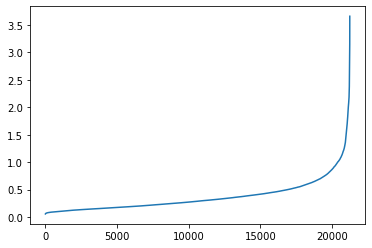

In [84]:
distances = distances[:,13]
distances = np.sort(distances, axis=0)
plt.plot(distances)
plt.show()

In [85]:
dbscan = DBSCAN(min_samples=14, eps=0.5)
dbscan.fit(dfs)

DBSCAN(min_samples=14)

In [86]:
pd.Series(dbscan.labels_).value_counts()

 0     8022
 1     7065
-1     2512
 2      789
 6      716
 7      646
 16     293
 3      215
 19     170
 4      146
 10      98
 5       88
 14      82
 11      64
 17      52
 13      41
 9       38
 20      35
 18      33
 12      32
 8       27
 21      26
 15      18
 22      17
 23      15
dtype: int64

In [89]:
df['cluster'] = dbscan.labels_
outliers = df[df['cluster']==-1]

outliers.mean()

Global_active_power               4.333502
Global_reactive_power             0.352925
Voltage                         236.064558
Global_intensity                 18.670860
Kitchen_consumption              16.071258
Laundry_consumption              18.553344
Other_appliances_consumption     15.463774
cluster                          -1.000000
dtype: float64

In [90]:
outliers.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption,cluster
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.0
mean,4.333502,0.352925,236.064558,18.670860,16.071258,18.553344,15.463774,-1.0
std,2.044619,0.198082,4.174624,8.730881,16.623939,16.500013,6.913838,0.0
min,0.302000,0.046000,225.120000,1.200000,1.000000,1.000000,1.000000,-1.0
25%,2.843500,0.200000,233.020000,12.400000,1.000000,2.000000,13.000000,-1.0
50%,4.352000,0.326000,236.000000,18.600000,2.000000,18.000000,17.000000,-1.0
75%,5.752000,0.486000,238.940000,24.600000,36.000000,33.000000,18.000000,-1.0
max,9.994000,1.198000,249.150000,43.400000,40.000000,60.000000,30.000000,-1.0


### Principal Component Analysis

In [91]:
df = pd.read_excel('power.xlsx')

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
ss = StandardScaler()
dfs = ss.fit_transform(df)

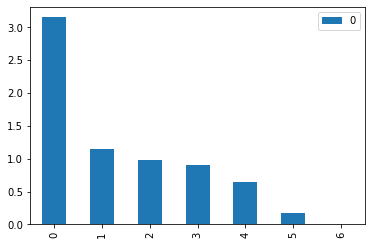

In [93]:
pca = PCA()
pca.fit(dfs)
pd.DataFrame(pca.explained_variance_).plot(kind='bar')
plt.show()

In [94]:
np.cumsum(pca.explained_variance_ratio_)

array([0.45043482, 0.61360152, 0.75329843, 0.88280014, 0.97599237,
       0.99990287, 1.        ])

In [95]:
pca = PCA(n_components=2)
dfs_pca = pca.fit_transform(dfs)
dfs_pca = pd.DataFrame(dfs_pca, columns=['PC1', 'PC2'])
dfs_pca.shape

(21240, 2)

In [96]:
dfs_pca.head(2)

,PC1,PC2
0,-1.067477,-0.532983
1,0.922166,-1.236260


In [97]:
lbl = pd.Series(dbscan.labels_)
lbl[lbl!=-1] = 0
lbl.value_counts()

 0    18728
-1     2512
dtype: int64

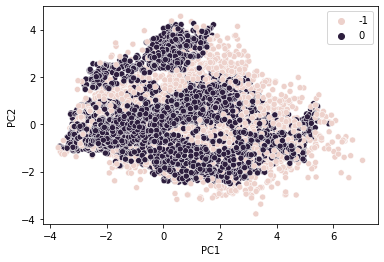

In [98]:
sns.scatterplot(x='PC1', y='PC2', data=dfs_pca, hue=lbl)
plt.show()